In [1]:
import pandas as pd
from pandas import DataFrame, Series
from pandas.tseries.resample import TimeGrouper
from pandas.tseries.offsets import DateOffset

In [2]:
import json
path = 'rockets.json'
record = [json.loads(line) for line in open(path)]
rockets = DataFrame(record)

In [3]:
rockets.head()

,_id,created_at,geo,source,text
0,{'$oid': '555e7c38311e9d08bb45c086'},{'$date': 1432255544000},None,Instagram,Getting ready for Game 2 Rockets vs. Warriors ...
1,{'$oid': '555e7c3b311e9d08bb45c087'},{'$date': 1432255545000},None,Twitter for Android,"RT @iamC_Mart: If Lil B curse James Harden, it..."
2,{'$oid': '555e7c3b311e9d08bb45c088'},{'$date': 1432255546000},None,Twitter for iPhone,Tonight's free pick: \n\nHouston Rockets +10.5...
3,{'$oid': '555e7c3b311e9d08bb45c089'},{'$date': 1432255546000},None,Tweetbot for iΟS,Let’s go Rockets!!
4,{'$oid': '555e7c3b311e9d08bb45c08a'},{'$date': 1432255546000},None,Twitter for iPhone,rockets boutta win game 2


In [4]:
created_at = pd.read_csv('rockets_datetime.csv', header = 0) 

In [5]:
created_at.head()

,created_at
0,2015-05-22T00:45:44Z
1,2015-05-22T00:45:45Z
2,2015-05-22T00:45:46Z
3,2015-05-22T00:45:46Z
4,2015-05-22T00:45:46Z


In [6]:
rockets['datetime'] = created_at

In [7]:
rockets.drop(['created_at','_id'], inplace=True, axis=1)

In [8]:
rockets.head()

,geo,source,text,datetime
0,None,Instagram,Getting ready for Game 2 Rockets vs. Warriors ...,2015-05-22T00:45:44Z
1,None,Twitter for Android,"RT @iamC_Mart: If Lil B curse James Harden, it...",2015-05-22T00:45:45Z
2,None,Twitter for iPhone,Tonight's free pick: \n\nHouston Rockets +10.5...,2015-05-22T00:45:46Z
3,None,Tweetbot for iΟS,Let’s go Rockets!!,2015-05-22T00:45:46Z
4,None,Twitter for iPhone,rockets boutta win game 2,2015-05-22T00:45:46Z


In [9]:
rockets['datetime'] = pd.to_datetime(pd.Series(rockets['datetime']))
rockets.set_index('datetime', drop=False, inplace=True)
rockets.index = rockets.index.tz_localize('UTC').tz_convert('EST')
rockets.index = rockets.index - DateOffset(hours = 12)
rockets.index

<class 'pandas.tseries.index.DatetimeIndex'>
[2015-05-21 07:45:44-05:00, ..., 2015-05-21 10:56:10-05:00]
Length: 105783, Freq: None, Timezone: EST

In [10]:
rockets.head()

,geo,source,text,datetime
2015-05-21 07:45:44-05:00,None,Instagram,Getting ready for Game 2 Rockets vs. Warriors ...,2015-05-22 00:45:44
2015-05-21 07:45:45-05:00,None,Twitter for Android,"RT @iamC_Mart: If Lil B curse James Harden, it...",2015-05-22 00:45:45
2015-05-21 07:45:46-05:00,None,Twitter for iPhone,Tonight's free pick: \n\nHouston Rockets +10.5...,2015-05-22 00:45:46
2015-05-21 07:45:46-05:00,None,Tweetbot for iΟS,Let’s go Rockets!!,2015-05-22 00:45:46
2015-05-21 07:45:46-05:00,None,Twitter for iPhone,rockets boutta win game 2,2015-05-22 00:45:46


In [11]:
rockets1m = rockets['datetime'].resample('1t', how='count')
rockets1m.index = rockets1m.index.tz_convert('EST')

In [12]:
avg = rockets1m.mean()

print (avg) 

550.953125



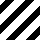
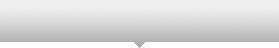
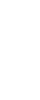
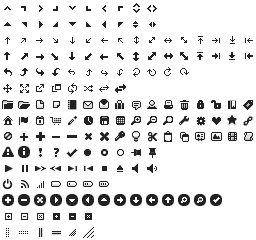
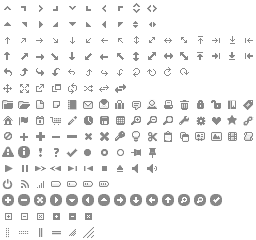
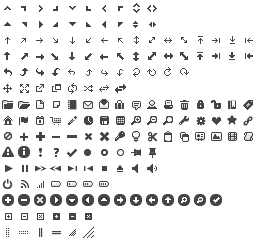
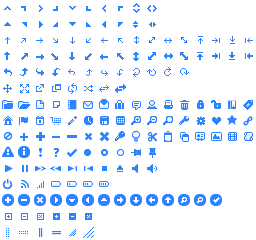
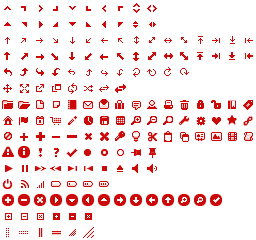
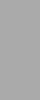
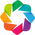
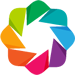
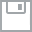
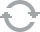
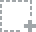
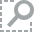
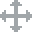
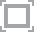
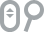

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline 
from bokeh import mpl
from bokeh.plotting import show
#import mpld3

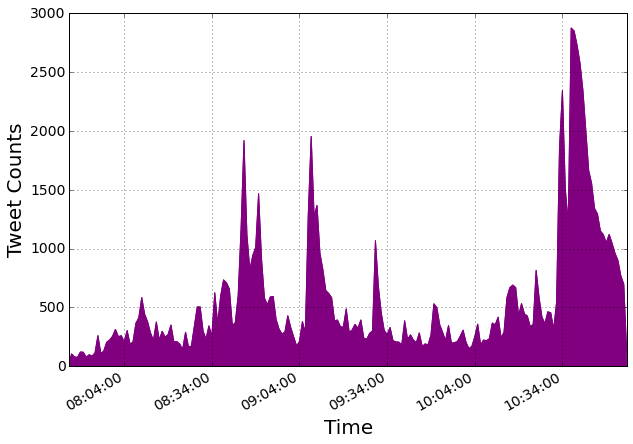

In [14]:
fig, ax = plt.subplots()
#rockets1m.index = rockets1m.index.tz_convert('EST')
rockets1m.plot(legend=False,figsize=(10,7), kind = 'area', color = 'purple')
plt.setp(ax.get_xticklabels(),fontsize=14,family='sans-serif')
plt.setp(ax.get_yticklabels(),fontsize=14,family='sans-serif')
plt.xlabel('Time',fontsize=20,family='sans-serif')
plt.ylabel('Tweet Counts',fontsize=20,family='sans-serif')
# Now add the start and end markers for each quarter
#plt.axvline(x='2015-05-21 08:00:00-05:00', linewidth=4, color='grey')
#plt.axvline(x='2015-05-21 08:40:00-05:00', linewidth=4, color='grey')
#plt.axvline(x='2015-05-21 09:20:00-05:00', linewidth=4, color='grey')
#plt.axvline(x='2015-05-21 10:00:00-05:00', linewidth=4, color='grey')
#plt.axvline(x='2015-05-21 10:40:00-05:00', linewidth=4, color='grey')
plt.grid(True)
plt.show()
#mpld3.display()
#show(mpl.to_bokeh(name="Tweets Over Time"))

In [15]:
source_counts = rockets.source.value_counts()

In [16]:
source_counts_max = source_counts[0:5]

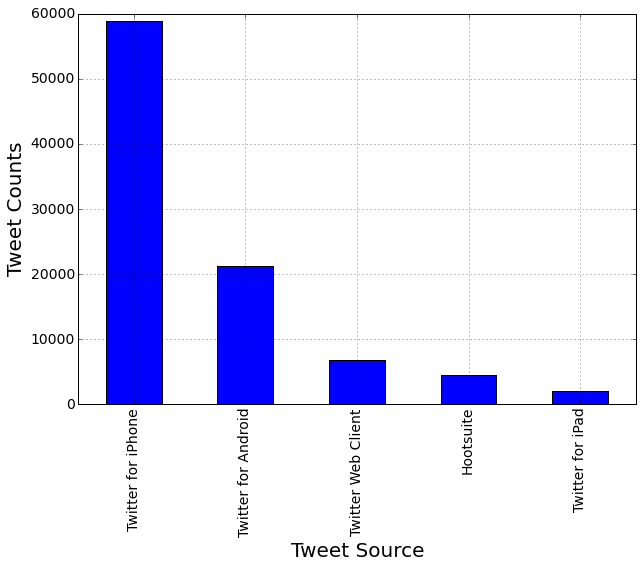

In [17]:
fig, ax = plt.subplots()
source_counts_max.plot(legend=False,figsize=(10,7), kind = 'bar')
plt.setp(ax.get_xticklabels(),fontsize=14,family='sans-serif')
plt.setp(ax.get_yticklabels(),fontsize=14,family='sans-serif')
plt.xlabel('Tweet Source',fontsize=20,family='sans-serif')
plt.ylabel('Tweet Counts',fontsize=20,family='sans-serif')
plt.grid(True)
plt.show()

In [18]:
geo = pd.read_csv('rockets_geo.csv', header = False, dtype = float, delimiter = ',')

In [19]:
geo.head()

,latitude,longitude
0,33.921442,-118.326652
1,29.791573,-95.584474
2,29.972518,-92.115556
3,37.750265,-122.202902
4,29.730970,-95.425696


In [20]:
geo.shape

(445, 2)

In [21]:
def latlong(geo):
    latitude,longitude = geo
    return latitude, longitude

geo['latlong_tuple']= geo[['latitude','longitude']].apply(latlong, axis=1)


In [22]:
geo.head()

,latitude,longitude,latlong_tuple
0,33.921442,-118.326652,"(33.921442, -118.326652)"
1,29.791573,-95.584474,"(29.791573, -95.584474)"
2,29.972518,-92.115556,"(29.972518, -92.115556)"
3,37.750265,-122.202902,"(37.750265, -122.202902)"
4,29.730970,-95.425696,"(29.73097, -95.425696)"


In [23]:
from IPython.display import HTML
import folium

In [24]:
def inline_map(map):
    #Embeds the HTML source of the map directly into the IPython notebook.
    map._build_map()
    return HTML('<iframe srcdoc="{srcdoc}" style="width: 100%; height: 510px; border: none"></iframe>'.format(srcdoc=map.HTML.replace('"', '&quot;')))

def embed_map(map, path="map.html"):
    #Embeds a linked iframe to the map into the IPython notebook.
    map.create_map(path=path)
    return HTML('<iframe src="files/{path}" style="width: 100%; height: 510px; border: none"></iframe>'.format(path=path))

In [25]:
map = folium.Map(location=[40, -99], zoom_start=4)

for latlong in geo['latlong_tuple']:
    map.circle_marker(latlong, popup_on=False, radius=25,
                  line_color='red',fill_color='red', fill_opacity=0.2)
inline_map(map)

In [26]:
from wordcloud import WordCloud, STOPWORDS

In [27]:
# join tweets to a single string
words = ' '.join(rockets['text'])

In [28]:
# remove URLs, RTs, and twitter handles
no_urls_no_tags = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

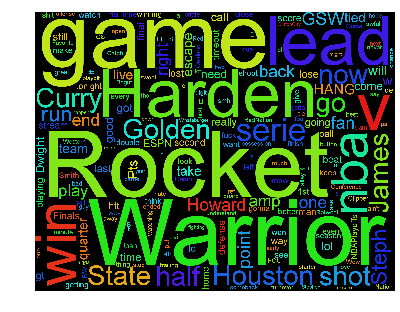

In [29]:
plt.figure(num=None, figsize=(7, 5), dpi=300)
wordcloud = WordCloud(
                      font_path='/Library/Fonts/Arial.ttf',
                      stopwords=STOPWORDS,
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(no_urls_no_tags)

plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('word_cloud_1.png', dpi=300)
plt.show()
#mpld3.display()

In [30]:
from scipy.misc import imread

twitter_mask = imread('/Users/Deepna/Pictures/twitter_mask.png', flatten=True)

/Users/Deepna/anaconda/lib/python3.4/site-packages/wordcloud/wordcloud.py:236: UserWarning: mask image should be unsigned byte between 0 and 255. Got a float array
  warnings.warn("mask image should be unsigned byte between 0 and"


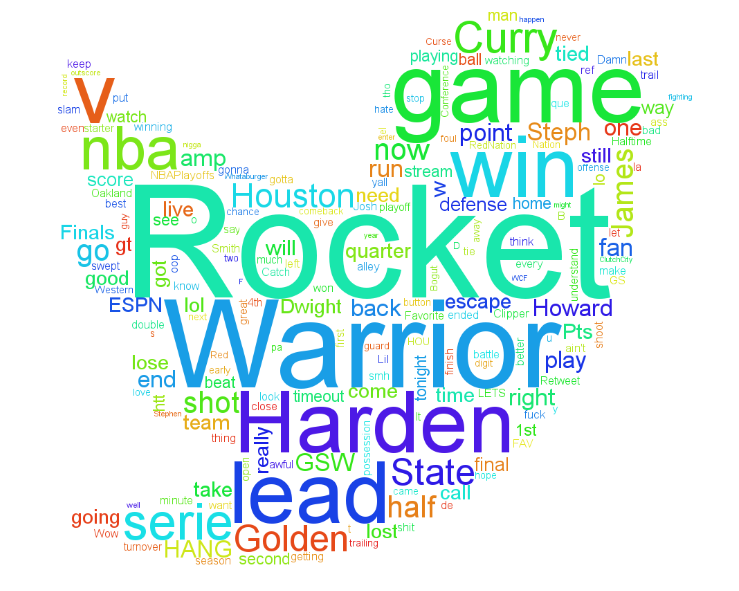

In [31]:
plt.figure(num=None, figsize=(15, 10), dpi=300)
wordcloud = WordCloud(
                      font_path='/Library/Fonts/Arial.ttf',
                      stopwords=STOPWORDS,
                      background_color='white',
                      width=1800,
                      height=1400,
                      mask=twitter_mask
            ).generate(no_urls_no_tags)

plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('wordcloud_2.png', dpi=300)
plt.show()

In [32]:
clean_tweets = pd.read_csv('rockets_cleantext.csv',header = False)

In [33]:
clean_tweets[0:10]

,CleanText
0,getting ready game rockets vs warriors warrior...
1,iamc mart lil b curse james harden curtains ro...
2,tonight free pick houston rockets u
3,let go rockets
4,rockets boutta win game
5,complexmag rockets fans begging lil b put base...
6,lildelvin rockets take l today
7,sportscenter rockets warriors meet game et esp...
8,nah cuh chill co qqrlnevt
9,rjthamacrj rockets play warriors hope kevin mc...


In [34]:
import nltk

In [35]:
# Tokenize into words
tokens = []
for tweet in clean_tweets['CleanText']:
    for word in nltk.word_tokenize(tweet):
        tokens.append(word)
tokens[:10]

['getting',
 'ready',
 'game',
 'rockets',
 'vs',
 'warriors',
 'warriors',
 'spashbros',
 'nba',
 'basketball']

In [36]:
freq_dist = nltk.FreqDist(tokens)

freq_dist

FreqDist({'rockets': 107567, 'warriors': 37022, 'co': 24712, 'game': 15395, 'harden': 13943, 'vs': 9178, 'win': 7899, 'nba': 7851, 'curry': 7501, 'series': 6936, ...})

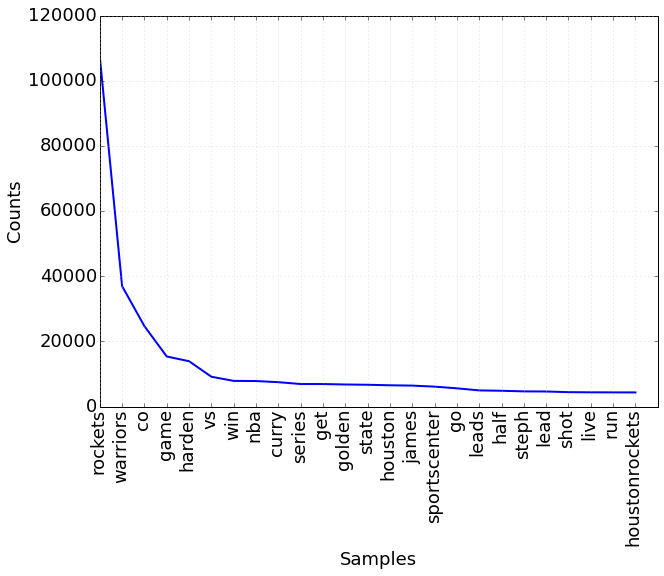

In [37]:
plt.figure(num=None, figsize=(10, 7), dpi=300)
ax = plt.subplot()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
freq_dist.plot(25)

In [38]:
import numpy as np

In [39]:
from textblob import TextBlob, Word

In [40]:
sentiments = [TextBlob(tweet).sentiment.polarity for tweet in clean_tweets['CleanText']]

In [41]:
print (clean_tweets['CleanText'][0:15], sentiments[0:15])

0     getting ready game rockets vs warriors warrior...
1     iamc mart lil b curse james harden curtains ro...
2                   tonight free pick houston rockets u
3                                        let go rockets
4                               rockets boutta win game
5     complexmag rockets fans begging lil b put base...
6                        lildelvin rockets take l today
7     sportscenter rockets warriors meet game et esp...
8                             nah cuh chill co qqrlnevt
9     rjthamacrj rockets play warriors hope kevin mc...
10    sportscenter draymond green enters arena game ...
11                                     warriors rockets
12                     rjack lock warriors rockets game
13    sportscenter rockets warriors meet game et esp...
14    espnstatsinfo rockets howard lineup postseason...
Name: CleanText, dtype: object [-0.1, 0.0, 0.4, 0.0, 0.2, 0.0, 0.0, -0.1, 0.0, -0.4, -0.12500000000000003, 0.0, -0.4, -0.1, 0.0]


In [42]:
avg_sentiment = np.sum(sentiments)/len(sentiments)
print (avg_sentiment)

0.0544129545809


In [43]:
import seaborn as sns
sns.set_style('darkgrid')

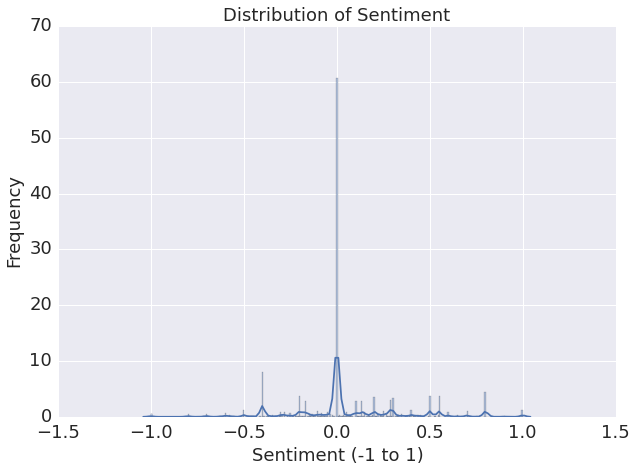

In [44]:
plt.figure(num=None, figsize=(10, 7), dpi=300)
ax = plt.subplot()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
sns.distplot(sentiments)
plt.title('Distribution of Sentiment', fontsize = 18)
plt.xlabel('Sentiment (-1 to 1)')
plt.ylabel('Frequency')
#mpld3.enable_notebook()

In [45]:
# Loop through all of the sentiments and put them into the appropriate group
pos_neg_neutral = []
for sentiment in sentiments:
    if sentiment <= -0.25:
        pos_neg_neutral.append('Negative')
    elif sentiment >= 0.25:
        pos_neg_neutral.append('Positive')
    elif sentiment > -0.25 and sentiment < 0.25:
        pos_neg_neutral.append('Neutral')
clean_tweets['Sentiment Category'] = np.array(pos_neg_neutral)

In [46]:
clean_tweets[0:5]

,CleanText,Sentiment Category
0,getting ready game rockets vs warriors warrior...,Neutral
1,iamc mart lil b curse james harden curtains ro...,Neutral
2,tonight free pick houston rockets u,Positive
3,let go rockets,Neutral
4,rockets boutta win game,Neutral


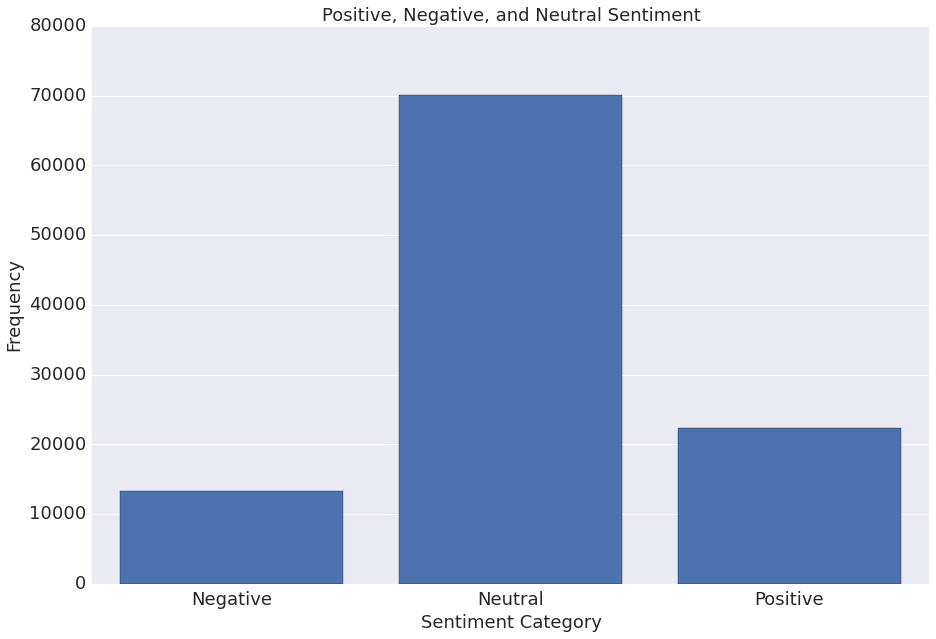

In [47]:
plt.figure(num=None, figsize=(15, 10), dpi=300)
ax = plt.subplot()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
sns.barplot(np.array(pos_neg_neutral))
plt.title('Positive, Negative, and Neutral Sentiment', fontsize = 18)
plt.xlabel('Sentiment Category', fontsize = 18)
plt.ylabel('Frequency', fontsize = 18)

In [48]:
import matplotlib

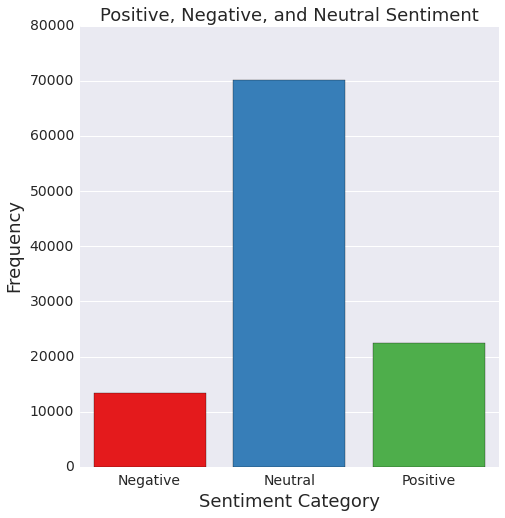

In [49]:
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)
sns.factorplot('Sentiment Category',data=clean_tweets, size = 7, aspect = 1, palette = 'Set1')
plt.title('Positive, Negative, and Neutral Sentiment', fontsize = 18)
plt.xlabel('Sentiment Category', fontsize = 18)
plt.ylabel('Frequency', fontsize = 18)

In [50]:
clean_tweets['Sentiment'] = sentiments

In [51]:
clean_tweets.index = rockets.index

In [52]:
clean_tweets.head()

,CleanText,Sentiment Category,Sentiment
2015-05-21 07:45:44-05:00,getting ready game rockets vs warriors warrior...,Neutral,-0.1
2015-05-21 07:45:45-05:00,iamc mart lil b curse james harden curtains ro...,Neutral,0.0
2015-05-21 07:45:46-05:00,tonight free pick houston rockets u,Positive,0.4
2015-05-21 07:45:46-05:00,let go rockets,Neutral,0.0
2015-05-21 07:45:46-05:00,rockets boutta win game,Neutral,0.2


In [53]:
sentiment1m = clean_tweets['Sentiment'].resample('1t', how='mean')
#sentiment5m = clean_tweets['Sentiment'].resample('5t', how='mean')
#sentiment20m = clean_tweets['Sentiment'].resample('20t', how='mean')

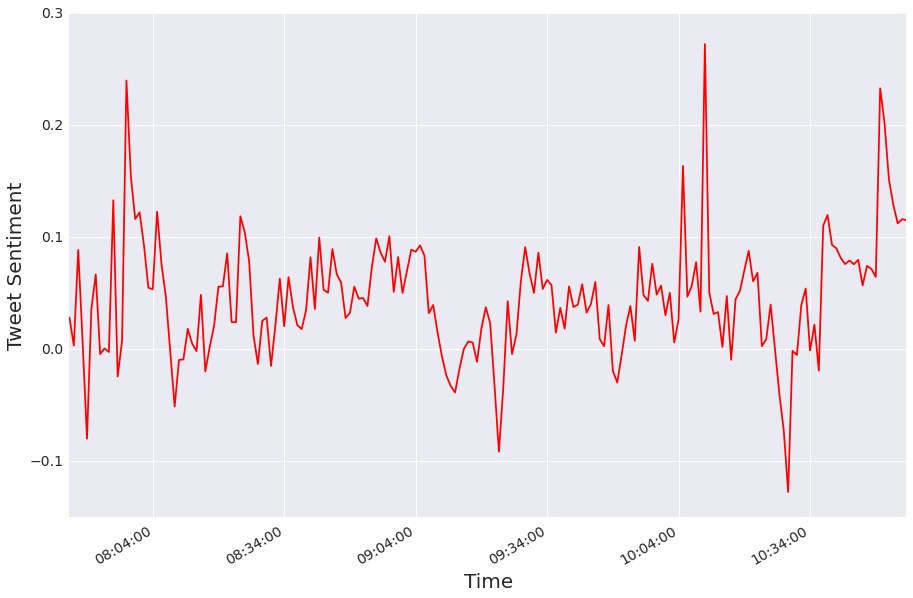

In [54]:
fig, ax = plt.subplots()
sentiment1m.plot(legend=False,figsize=(15,10), color = 'red')
#sentiment5m.plot(legend=False,figsize=(15,10), color = 'blue')
#sentiment20m.plot(legend=False,figsize=(15,10), color = 'green')
plt.setp(ax.get_xticklabels(),fontsize=14,family='sans-serif')
plt.setp(ax.get_yticklabels(),fontsize=14,family='sans-serif')
plt.xlabel('Time',fontsize=20,family='sans-serif')
plt.ylabel('Tweet Sentiment',fontsize=20,family='sans-serif')
# Now add the start and end markers
#plt.axvline(x='2015-05-21 08:00:00-05:00', linewidth=4, color='grey')
#plt.axvline(x='2015-05-21 08:40:00-05:00', linewidth=4, color='grey')
#plt.axvline(x='2015-05-21 09:20:00-05:00', linewidth=4, color='grey')
#plt.axvline(x='2015-05-21 10:00:00-05:00', linewidth=4, color='grey')
#plt.axvline(x='2015-05-21 10:40:00-05:00', linewidth=4, color='grey')
plt.grid(True)
plt.show()

In [55]:
clean_tweets['Sentiment'].min()

-1.0

In [56]:
clean_tweets['Sentiment'].max()

1.0

In [57]:
print (clean_tweets[clean_tweets['Sentiment']==clean_tweets['Sentiment'].min()]['CleanText'].values[0])

bigtrain ya boring watching rockets blowing teams


In [58]:
print (clean_tweets[clean_tweets['Sentiment']==clean_tweets['Sentiment'].max()]['CleanText'].values[0])

best chef world dynamite bounds flavor town mayor co xwwixgxgbm
